# Monetary Policy: Theory & Practice
# Assignment 2
### 1. Phillips Curve II / Shocks

Anton.Koshelev@campus.lmu.de

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from fredapi import Fred
fred = Fred(api_key='75baef3e8d71da67e966c3afeeef3cf3') # my personal api key, feel free to use it

#### As robustness tests for estimating the Phillips curve in the US, estimate the curve also for the period 1950-1970. (As the next subtask in the assignment 2 suggensts using quarterly CPI inflation, we will use it in the current subtask too)

In [2]:
unem = fred.get_series('UNRATE', frequency='q') # unemployment rate
infl = fred.get_series('CPIAUCSL', frequency='q').pct_change() # we need inflation rate, not price level

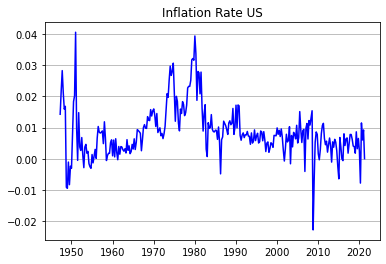

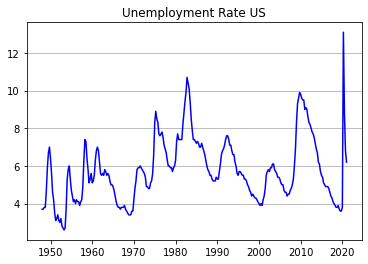

In [3]:
plt.plot(infl, c='b')
plt.title('Inflation Rate US')
plt.grid(axis='y')
plt.show()

plt.plot(unem, c='b')
plt.title('Unemployment Rate US')
plt.grid(axis='y')
plt.show()

In [4]:
# selecting 1950-1970 period
infl_50_70 = infl.loc[(infl.index >= '1950-01-01') & (infl.index < '1970-01-01')]
unem_50_70 = unem.loc[(unem.index >= '1950-01-01') & (unem.index < '1970-01-01')]

# selecting 1970-1995 period
infl_70_95 = infl.loc[(infl.index >= '1970-01-01') & (infl.index <= '1995-01-01')]
unem_70_95 = unem.loc[(unem.index >= '1970-01-01') & (unem.index <= '1995-01-01')]

# selecting 1996-2019 period
infl_96_19 = infl.loc[(infl.index >= '1996-01-01') & (infl.index < '2019-01-01')]
unem_96_19 = unem.loc[(unem.index >= '1996-01-01') & (unem.index < '2019-01-01')]

#### Traditional Phillips Curve (1950-1970): $\pi_{t} = \alpha u_{n} + \alpha u_{t}$

In [5]:
# target variable (LHS)
y = infl_50_70.values
# explanatory variable (RHS non constant)
x = unem_50_70.values
X = sm.add_constant(x) # adding constant
results_50_70_traditional = sm.OLS(y, X).fit()
print(results_50_70_traditional.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     11.60
Date:                Mon, 17 May 2021   Prob (F-statistic):            0.00104
Time:                        09:47:48   Log-Likelihood:                 296.68
No. Observations:                  80   AIC:                            -589.4
Df Residuals:                      78   BIC:                            -584.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0148      0.003      5.423      0.0

In [6]:
# implied natural rate of unemployment
u_n = 0.0148 / 0.0019
print('Natural unemployment rate implied by traditional PC in 1950-1970:', np.round(u_n, 3))

Natural unemployment rate implied by traditional PC in 1950-1970: 7.789


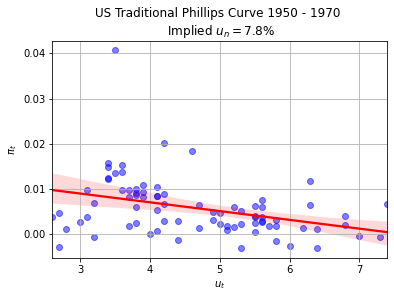

In [7]:
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
plt.ylabel('$\pi_{t}$')
plt.xlabel('$u_{t}$')
plt.title('US Traditional Phillips Curve 1950 - 1970 \n Implied $u_{n} = 7.8\%$')
plt.grid()
plt.show()

#### Using quarterly data for CPI inflation, estimate the adaptive Phillips curve specification for the period 1970–1995.

$\pi_{t}^{e} = \pi_{t−1} \rightarrow \pi_{t} − \pi_{t-1} = \alpha u_{n} +\alpha u_{t}$

In [8]:
# target variable (LHS)
y = infl_70_95.diff().iloc[1:].values # first element in target is not defined
# explanatory variable (RHS non constant)
x = unem_70_95.iloc[1:].values # first element in target y is not defined, so we also skip it in the x
X = sm.add_constant(x) # adding constant
results_70_95_adaptive = sm.OLS(y, X).fit()
print(results_70_95_adaptive.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.950
Date:                Mon, 17 May 2021   Prob (F-statistic):             0.0497
Time:                        09:47:49   Log-Likelihood:                 389.67
No. Observations:                 100   AIC:                            -775.3
Df Residuals:                      98   BIC:                            -770.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.003      1.919      0.0

In [9]:
# implied natural rate of unemployment
u_n = 0.0050 / 0.0008
print('Natural unemployment rate implied by adaptive PC in 1970-1995:', np.round(u_n, 3))

Natural unemployment rate implied by adaptive PC in 1970-1995: 6.25


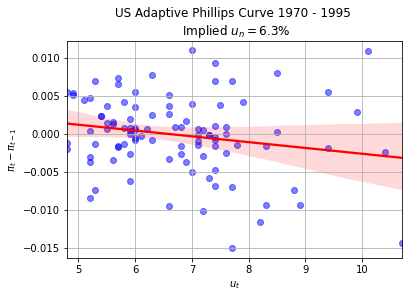

In [10]:
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
plt.ylabel('$\pi_{t} - \pi_{t-1}$')
plt.xlabel('$u_{t}$')
plt.title('US Adaptive Phillips Curve 1970 - 1995 \n Implied $u_{n} = 6.3\%$')
plt.grid()
plt.show()

#### Using quarterly data for CPI inflation, estimate the traditional Phillips curve specification for the period 1996–2019.

$\pi_{t} = \alpha u_{n} + \alpha u_{t}$

In [11]:
# target variable (LHS)
y = infl_96_19.values
# explanatory variable (RHS non constant)
x = unem_96_19.values
X = sm.add_constant(x) # adding constant
results_96_19_traditional = sm.OLS(y, X).fit()
print(results_96_19_traditional.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.984
Date:                Mon, 17 May 2021   Prob (F-statistic):              0.162
Time:                        09:48:00   Log-Likelihood:                 357.53
No. Observations:                  92   AIC:                            -711.1
Df Residuals:                      90   BIC:                            -706.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0080      0.002      4.268      0.0

In [12]:
# implied natural rate of unemployment
u_n = 0.008 / 0.0004
print('Natural unemployment rate implied by traditional PC in 1996-2019:', np.round(u_n, 3))

Natural unemployment rate implied by traditional PC in 1996-2019: 20.0


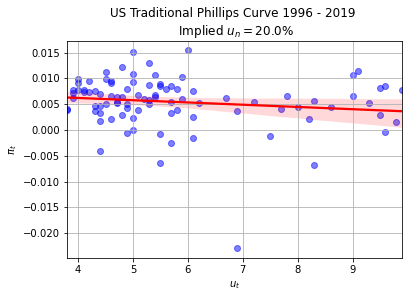

In [13]:
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
plt.ylabel('$\pi_{t}$')
plt.xlabel('$u_{t}$')
plt.title('US Traditional Phillips Curve 1996 - 2019 \n Implied $u_{n} = 20.0\%$')
plt.grid()
plt.show()

#### Adaptive Phillips Curve 1996-2019

In [14]:
# target variable (LHS)
y = infl_96_19.diff().iloc[1:].values # first element in target is not defined
# explanatory variable (RHS non constant)
x = unem_96_19.iloc[1:].values # first element in target y is not defined, so we also skip it in the x
X = sm.add_constant(x) # adding constant
results_96_19_adaptive = sm.OLS(y, X).fit()
print(results_96_19_adaptive.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1272
Date:                Mon, 17 May 2021   Prob (F-statistic):              0.722
Time:                        09:48:22   Log-Likelihood:                 332.13
No. Observations:                  91   AIC:                            -660.3
Df Residuals:                      89   BIC:                            -655.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.002     -0.365      0.7

In [15]:
# implied natural rate of unemployment
u_n = 0.0009 / 0.0001
print('Natural unemployment rate implied by adaptive PC in 1996-2019:', np.round(u_n, 3))

Natural unemployment rate implied by adaptive PC in 1996-2019: 9.0


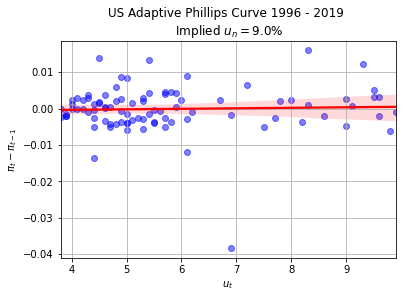

In [16]:
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
plt.ylabel('$\pi_{t} - \pi_{t-1}$')
plt.xlabel('$u_{t}$')
plt.title('US Adaptive Phillips Curve 1996 - 2019 \n Implied $u_{n} = 9.0\%$')
plt.grid()
plt.show()

### 2. The break-even inflation rate (BEIR)

(a) Using data from the Federal Reserve Economic Data (Federal Reserve Bank of St. Louis, 2021) regarding the interest rates on five-year TIPS (Code FII5) and on regular Treasury bonds (Code GS5), calculate the implied expected inflation rate over the next five years.

In [25]:
fii5 = fred.get_series('FII5', observation_start='2005-01-01') # five-year TIPS
gs5 = fred.get_series('GS5', observation_start='2005-01-01') # regular Treasury bonds, five-year

In [26]:
beir5 = gs5 - fii5

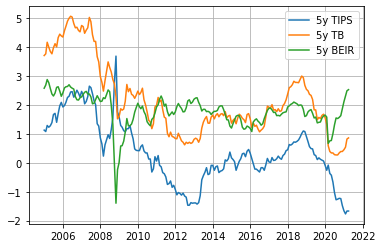

In [27]:
plt.plot(fii5, label='5y TIPS')
plt.plot(gs5, label='5y TB')
plt.plot(beir5, label='5y BEIR')
plt.grid()
plt.legend()
plt.show()

In [34]:
print('Implied expected inflation rate over the next five years starting {} is {} %'.format(beir5.index[-1], 
                                                                                            beir5.iloc[-1]))

Implied expected inflation rate over the next five years starting 2021-04-01 00:00:00 is 2.53 %


(b) Using the data from (a) as well as the corresponding 10-year rates (FRED Codes
FII10 and GS10) to construct a measure of $\pi^{e}_{t,5,5}$ .

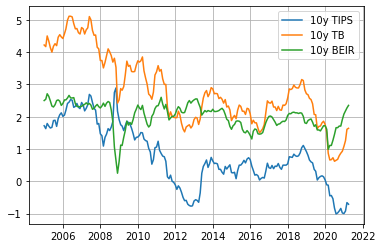

Implied expected inflation rate over the next ten years starting 2021-04-01 00:00:00 is 2.3499999999999996 %


In [35]:
fii10 = fred.get_series('FII10', observation_start='2005-01-01') # ten-year TIPS
gs10 = fred.get_series('GS10', observation_start='2005-01-01') # ten-year regular Treasury bonds
beir10 = gs10 - fii10 # 10y BEIR
plt.plot(fii10, label='10y TIPS')
plt.plot(gs10, label='10y TB')
plt.plot(beir10, label='10y BEIR')
plt.grid()
plt.legend()
plt.show()
print('Implied expected inflation rate over the next ten years starting {} is {} %'.format(beir10.index[-1], 
                                                                                            beir10.iloc[-1]))

$\pi^{e}_{t,5,5} = \frac{10\pi_{t,10}-5\pi_{t,5}}{5} = 2 BEIR_{10} - BEIR_{5}$

In [37]:
fier55 = 2 * beir10 - beir5 

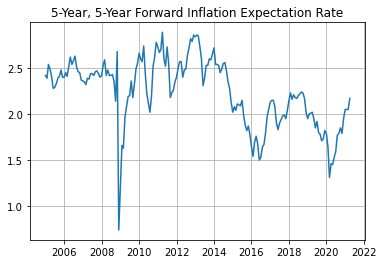

In [47]:
plt.plot(fier55)
plt.grid()
plt.title('5-Year, 5-Year Forward Inflation Expectation Rate')
plt.show()

In [46]:
print('5-Year, 5-Year Forward Inflation Expectation Rate starting {} is {} %'.format(fier55.index[-1], 
                                                                                     fier55.iloc[-1]))

5-Year, 5-Year Forward Inflation Expectation Rate starting 2021-04-01 00:00:00 is 2.1699999999999995 %
